In [81]:
library(tidyverse)
library(dplyr)

In [82]:
load("38779-0001-Data.rda")
load("38740-0001-Data.rda")
load("38743-0001-Data.rda")

In [83]:
da1 = da38779.0001[,c(3, 8, 12, 13, 18, 32, 34:77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]
da2 = da38740.0001[,c(3, 8, 12, 13, 18, 32, 34:77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]
da3 = da38743.0001[,c(3, 8, 12, 13, 18, 32, 34:77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]

In [84]:

subset_da1 <- subset(da1, OFFENSE == '04 ')
subset_da2 <- subset(da2, OFFENSE == '04 ')
subset_da3 <- subset(da3, OFFENSE == '04 ')

In [85]:
combined_df <- bind_rows(subset_da1, subset_da2, subset_da3)
dim(combined_df)

[1] 174335     62

In [86]:
columns_to_replace_na <- c(7:62)

combined_df[, columns_to_replace_na] <- lapply(combined_df[, columns_to_replace_na], function(x) replace(x, is.na(x), 0))
                                               

In [87]:
summary(combined_df)


               STATE             YEAR                    SUB        CORE      
 (04) California  : 18000   Min.   :2017   (0) Non-Suburban:84991   N:155452  
 (42) Texas       : 16672   1st Qu.:2017   (1) Suburban    :89344   Y: 18883  
 (37) Pennsylvania: 10705   Median :2018                                      
 (21) Michigan    :  7206   Mean   :2018                                      
 (41) Tennessee   :  6517   3rd Qu.:2019                                      
 (29) New Jersey  :  6233   Max.   :2019                                      
 (Other)          :109002                                                     
     MONTH           OFFENSE            M0_9              M10_12        
 Min.   : 1.000   04     :174335   Min.   :0.000000   Min.   : 0.00000  
 1st Qu.: 4.000   00     :     0   1st Qu.:0.000000   1st Qu.: 0.00000  
 Median : 6.000   01A    :     0   Median :0.000000   Median : 0.00000  
 Mean   : 6.455   01B    :     0   Mean   :0.002604   Mean   : 0.02741  
 3r

In [88]:
total_na_count <- sum(is.na(combined_df))
total_na_count

[1] 0

In [89]:
weights <- c(4.5, 11, 13.5, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65, 
             4.5, 11, 13.5, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65)

weights1 <- c(4.5, 11, 13.5, 15, 16, 17, 18, 4.5, 11, 13.5, 15, 16, 17, 18)

weights2 <- c(19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65,
             19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65)


columns_to_sum <- c(7:50)
combined_df$Age_total <- rowSums(combined_df[, columns_to_sum] * weights[1:length(weights)])

juve_cols <- c(7:13, 29:35)
combined_df$Age_juve <- rowSums(combined_df[, juve_cols] * weights1[1:length(weights1)])

adult_cols <- c(14:28, 36:50)
combined_df$Age_adult <- rowSums(combined_df[, adult_cols] * weights2[1:length(weights2)])


In [90]:
length(weights1)

[1] 14

In [91]:
head(combined_df)


,STATE,YEAR,SUB,CORE,MONTH,OFFENSE,M0_9,M10_12,M13_14,M15,⋯,JB,JI,JA,AH,AN,JH,JN,Age_total,Age_juve,Age_adult
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,(0) Non-Suburban,Y,1,04,0,1,1,2,⋯,0,5,0,0,0,0,0,2291.0,36,2166
2,(50) Alaska,2019,(0) Non-Suburban,Y,2,04,1,1,1,0,⋯,1,1,0,0,0,0,0,2429.5,55,2530
3,(50) Alaska,2019,(0) Non-Suburban,Y,3,04,0,1,1,2,⋯,1,1,0,0,0,0,0,2904.0,81,3175
4,(50) Alaska,2019,(0) Non-Suburban,Y,4,04,0,0,1,3,⋯,1,1,2,0,0,0,0,3287.0,195,3549
5,(50) Alaska,2019,(0) Non-Suburban,Y,5,04,0,1,2,1,⋯,0,2,0,0,0,0,0,2951.5,128,3370
6,(50) Alaska,2019,(0) Non-Suburban,Y,6,04,0,0,1,0,⋯,0,2,0,0,0,0,0,2442.5,102,2853


In [92]:
combined_df$Total <- rowSums(combined_df[, 51:62], na.rm = TRUE)
combined_df$juve <- rowSums(combined_df[,juve_cols],na.rm=TRUE)
combined_df$adult <- rowSums(combined_df[, adult_cols], na.rm = TRUE)



combined_df <- combined_df[combined_df$Total != 0, ]
     

In [203]:
combined_df_1 <- combined_df[,c(5:28)]

In [202]:
dim(combined_df)


[1] 165681     28

In [94]:
combined_df$avgtotal <- ifelse(combined_df$Total != 0, combined_df$Age_total/combined_df$Total,0)
combined_df$avgjuve <- ifelse(combined_df$juve != 0, combined_df$Age_juve/combined_df$juve,0)
combined_df$avgadult <- ifelse(combined_df$adult != 0, combined_df$Age_adult/combined_df$adult,0)

In [95]:
head(combined_df)

,STATE,YEAR,SUB,CORE,MONTH,OFFENSE,M0_9,M10_12,M13_14,M15,⋯,JN,Age_total,Age_juve,Age_adult,Total,juve,adult,avgtotal,avgjuve,avgadult
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,(0) Non-Suburban,Y,1,04,0,1,1,2,⋯,0,2291.0,36,2166,87,8,79,26.33333,4.5,27.41772
2,(50) Alaska,2019,(0) Non-Suburban,Y,2,04,1,1,1,0,⋯,0,2429.5,55,2530,87,5,82,27.92529,11.0,30.85366
3,(50) Alaska,2019,(0) Non-Suburban,Y,3,04,0,1,1,2,⋯,0,2904.0,81,3175,99,6,93,29.33333,13.5,34.13978
4,(50) Alaska,2019,(0) Non-Suburban,Y,4,04,0,0,1,3,⋯,0,3287.0,195,3549,100,13,87,32.87000,15.0,40.79310
5,(50) Alaska,2019,(0) Non-Suburban,Y,5,04,0,1,2,1,⋯,0,2951.5,128,3370,99,8,91,29.81313,16.0,37.03297
6,(50) Alaska,2019,(0) Non-Suburban,Y,6,04,0,0,1,0,⋯,0,2442.5,102,2853,96,6,90,25.44271,17.0,31.70000


In [96]:
combined_df <- combined_df[,-c(6:50)]

In [97]:
summer_months <- c(5,6,7,8,9,10)
winter_months <- c(1,2,3,4,11,12)
combined_df$summer <- ifelse(combined_df$MONTH %in% summer_months, 1,0)


In [98]:
head(combined_df)

,STATE,YEAR,SUB,CORE,MONTH,AW,AB,AI,AA,JW,⋯,Age_total,Age_juve,Age_adult,Total,juve,adult,avgtotal,avgjuve,avgadult,summer
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,(0) Non-Suburban,Y,1,28,13,36,4,1,⋯,2291.0,36,2166,87,8,79,26.33333,4.5,27.41772,0
2,(50) Alaska,2019,(0) Non-Suburban,Y,2,33,18,28,3,3,⋯,2429.5,55,2530,87,5,82,27.92529,11.0,30.85366,0
3,(50) Alaska,2019,(0) Non-Suburban,Y,3,36,14,35,8,4,⋯,2904.0,81,3175,99,6,93,29.33333,13.5,34.13978,0
4,(50) Alaska,2019,(0) Non-Suburban,Y,4,33,12,39,5,7,⋯,3287.0,195,3549,100,13,87,32.87000,15.0,40.79310,0
5,(50) Alaska,2019,(0) Non-Suburban,Y,5,28,11,45,9,4,⋯,2951.5,128,3370,99,8,91,29.81313,16.0,37.03297,1
6,(50) Alaska,2019,(0) Non-Suburban,Y,6,29,8,42,13,2,⋯,2442.5,102,2853,96,6,90,25.44271,17.0,31.70000,1


In [99]:
summary(combined_df)
combined_df$SUB = factor(combined_df$SUB, labels = c('nonsuburban','suburban'))
combined_df$CORE = factor(combined_df$CORE, labels = c('noncore','core'))

               STATE             YEAR                    SUB        CORE      
 (04) California  : 17983   Min.   :2017   (0) Non-Suburban:81223   N:147031  
 (42) Texas       : 12833   1st Qu.:2017   (1) Suburban    :84458   Y: 18650  
 (37) Pennsylvania: 10684   Median :2018                                      
 (21) Michigan    :  7116   Mean   :2018                                      
 (41) Tennessee   :  6516   3rd Qu.:2019                                      
 (29) New Jersey  :  6221   Max.   :2019                                      
 (Other)          :104328                                                     
     MONTH              AW                AB                 AI         
 Min.   : 1.000   Min.   :  0.000   Min.   :   0.000   Min.   :  0.000  
 1st Qu.: 4.000   1st Qu.:  1.000   1st Qu.:   0.000   1st Qu.:  0.000  
 Median : 6.000   Median :  1.000   Median :   0.000   Median :  0.000  
 Mean   : 6.454   Mean   :  3.346   Mean   :   1.799   Mean   :  0.142  
 3r

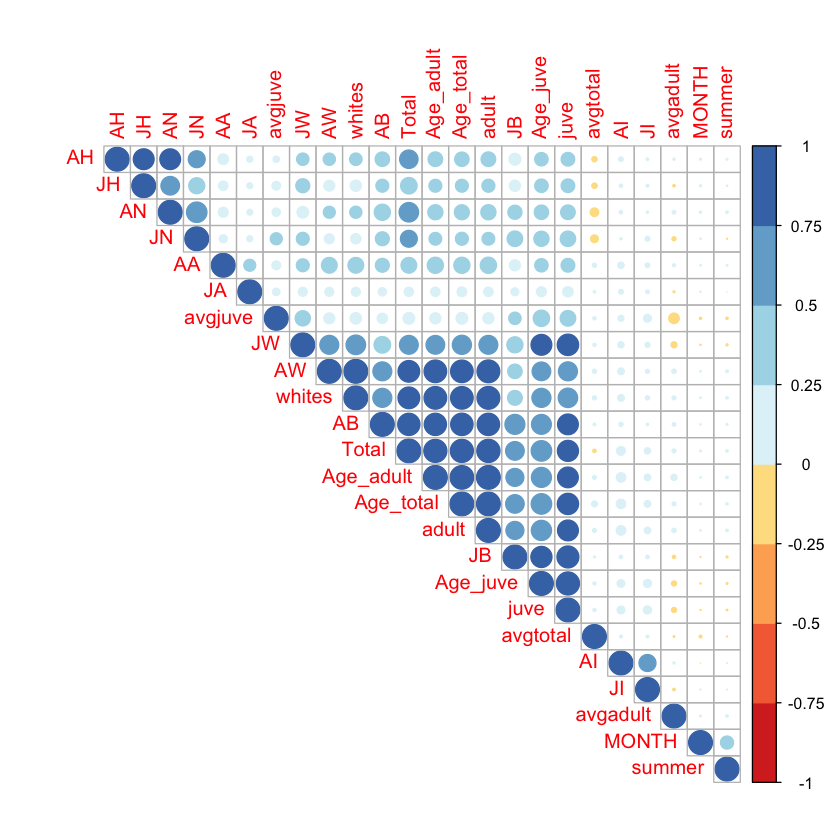

In [204]:
library(corrplot)
library(RColorBrewer)
M <-cor(combined_df_1)
corrplot(M, type="upper", order="hclust",
         col=brewer.pal(n=8, name="RdYlBu"))

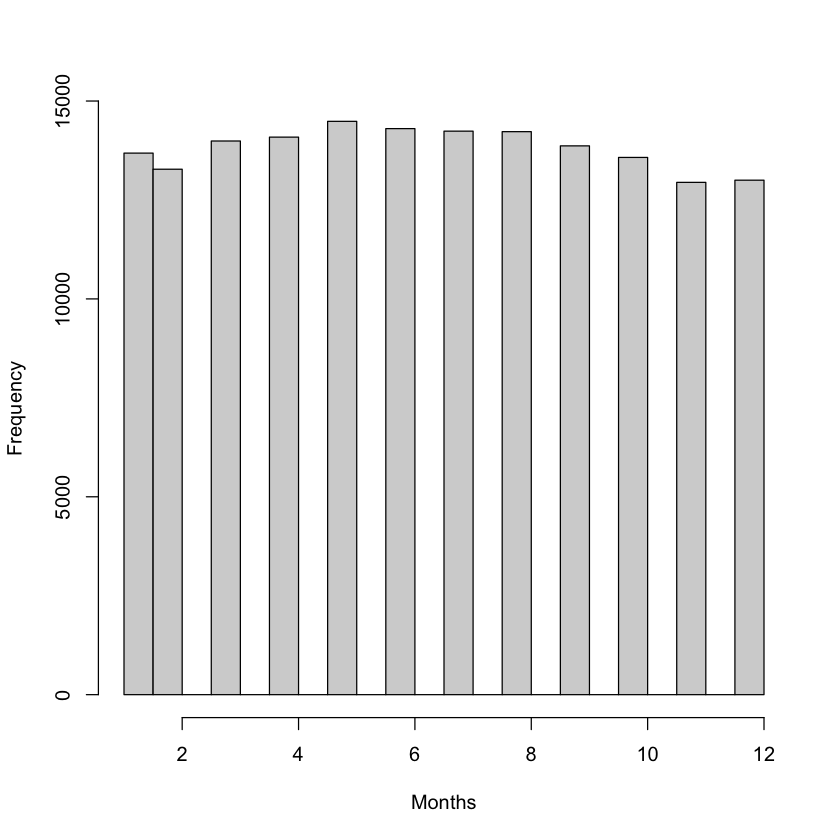

In [188]:
hist(combined_df$MONTH,xlab="Months",main="")

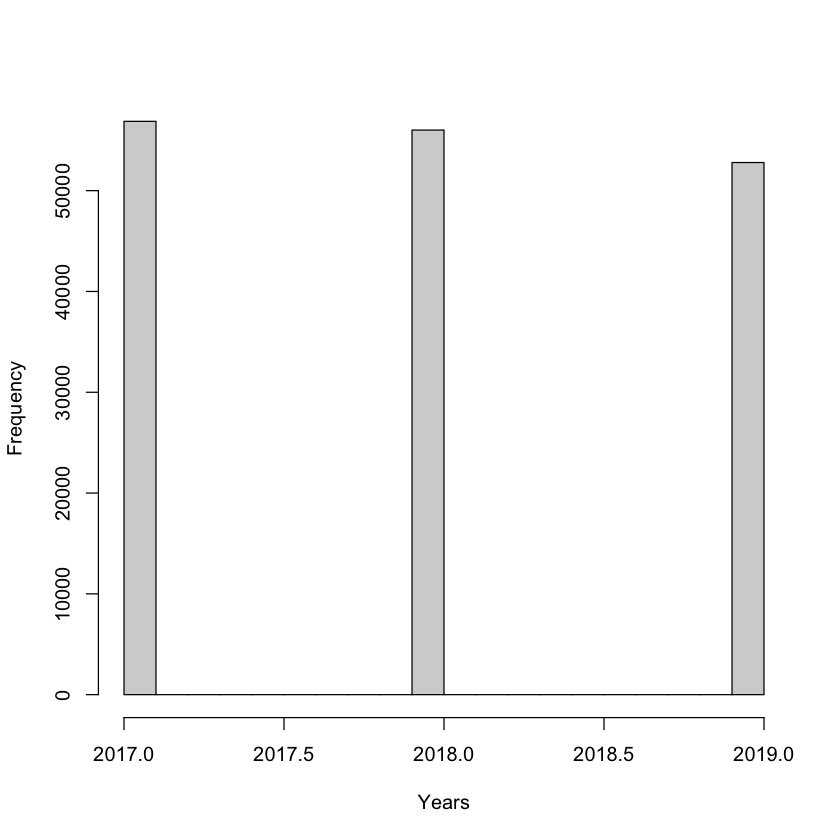

In [187]:
hist(combined_df$YEAR,xlab="Years",main="")

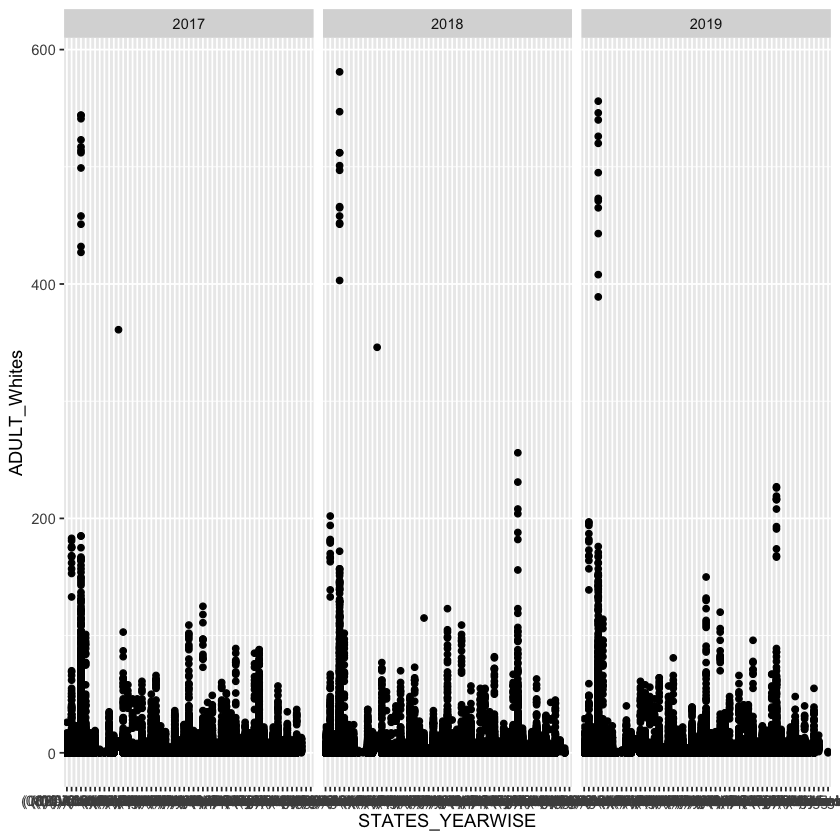

In [205]:
ggplot(data = combined_df, aes(x = STATE, y = AW)) +
  geom_point() + facet_wrap(~ YEAR) +
  labs(y = "ADULT_Whites",
       x = "STATES_YEARWISE")

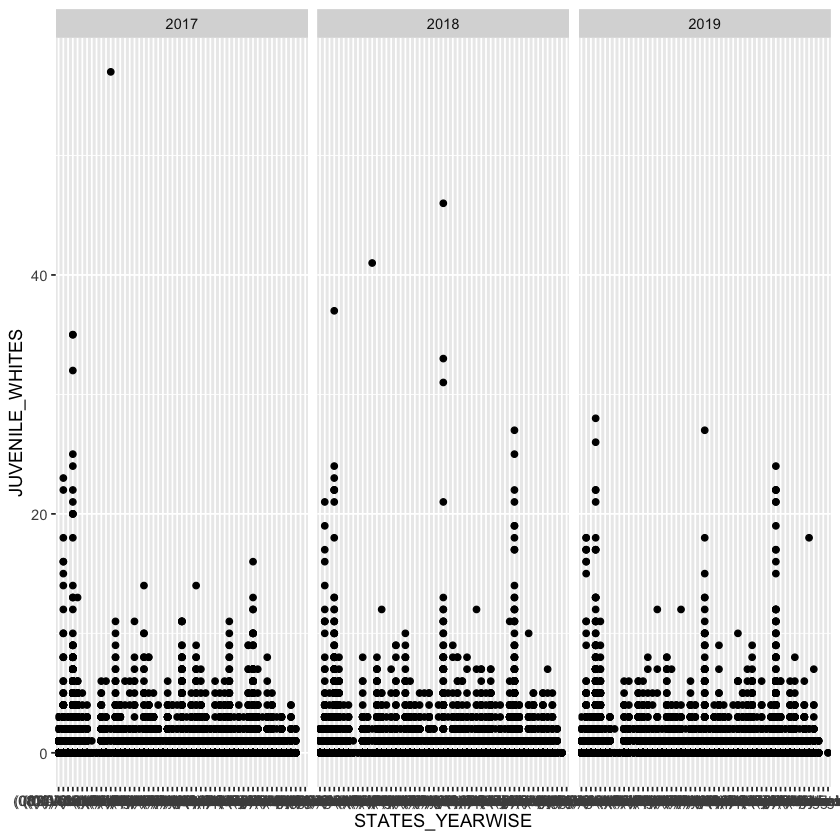

In [191]:
ggplot(data = combined_df, aes(x = STATE, y = JW)) +
  geom_point() + facet_wrap(~ YEAR) +
  labs(y = "JUVENILE_WHITES",
       x = "STATES_YEARWISE")

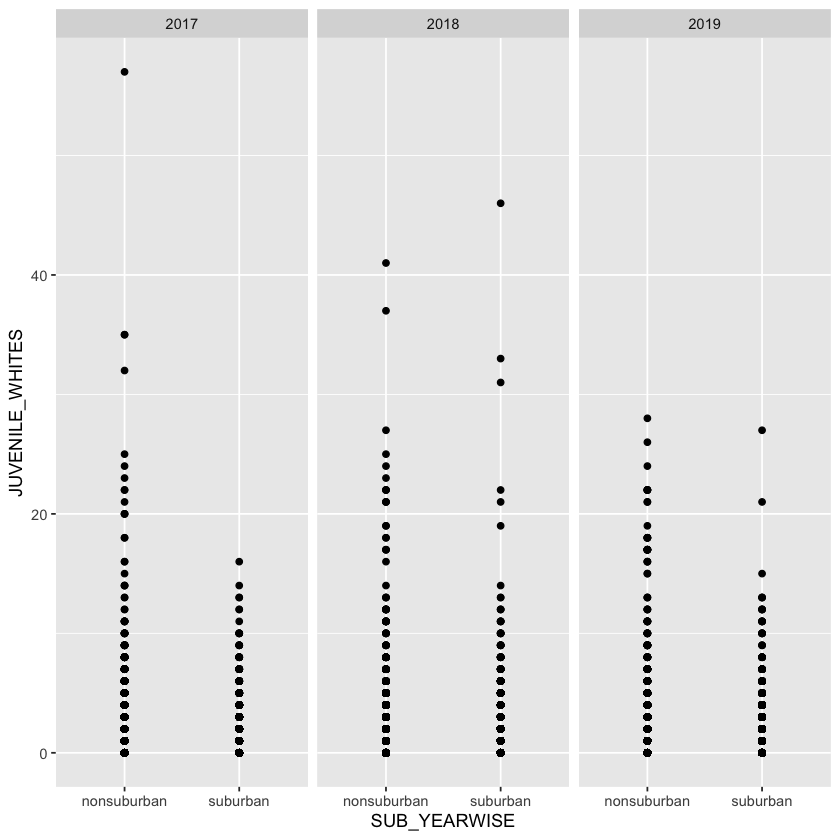

In [192]:
ggplot(data = combined_df, aes(x = SUB, y = JW)) +
  geom_point() + facet_wrap(~ YEAR) +
  labs(y = "JUVENILE_WHITES",
       x = "SUB_YEARWISE")

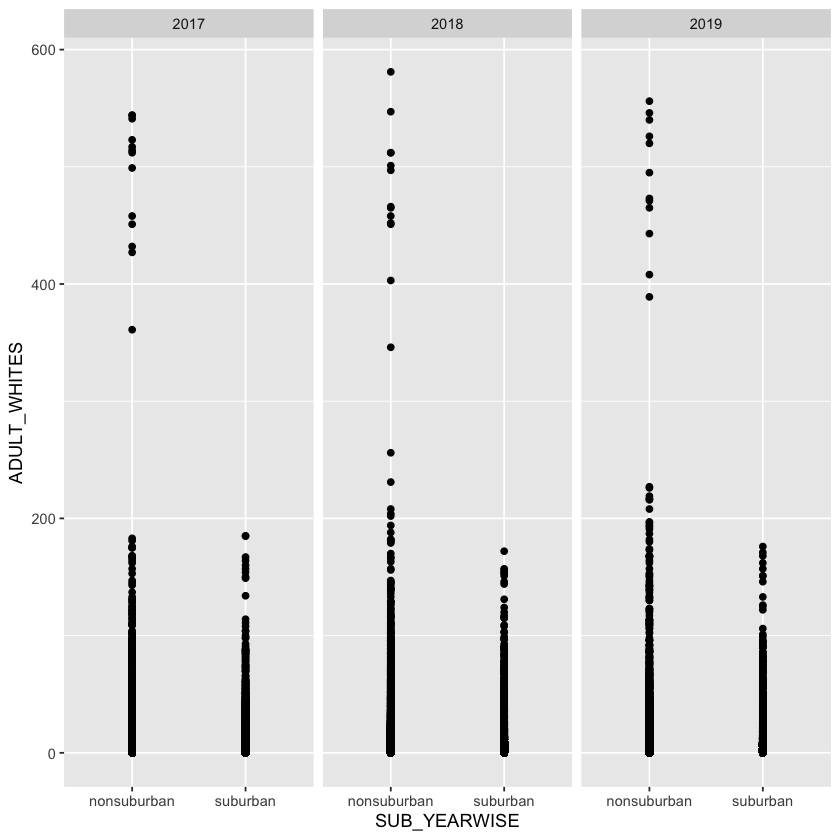

In [193]:
ggplot(data = combined_df, aes(x = SUB, y = AW)) +
  geom_point() + facet_wrap(~ YEAR) +
  labs(y = "ADULT_WHITES",
       x = "SUB_YEARWISE")

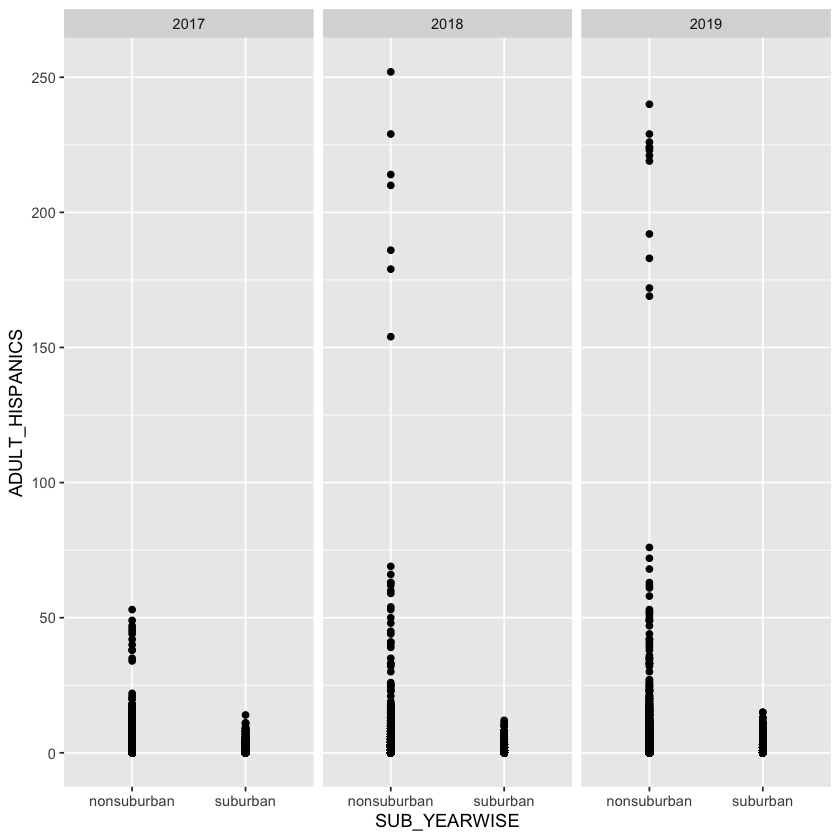

In [194]:
ggplot(data = combined_df, aes(x = SUB, y = AH)) +
  geom_point() + facet_wrap(~ YEAR) +
  labs(y = "ADULT_HISPANICS",
       x = "SUB_YEARWISE")

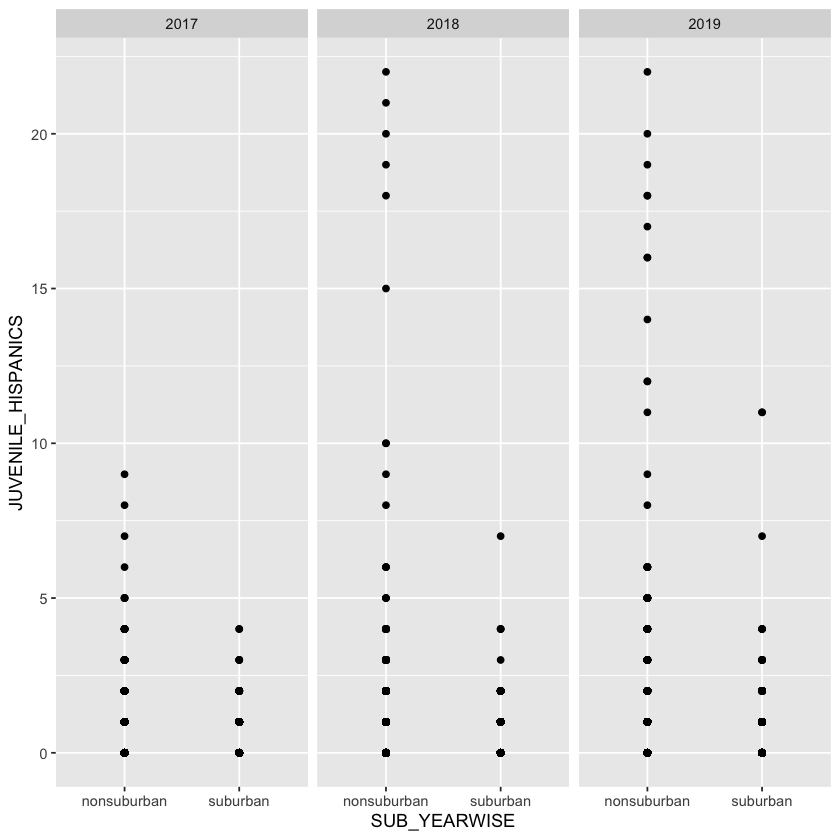

In [195]:
ggplot(data = combined_df, aes(x = SUB, y = JH)) +
  geom_point() + facet_wrap(~ YEAR) +
  labs(y = "JUVENILE_HISPANICS",
       x = "SUB_YEARWISE")

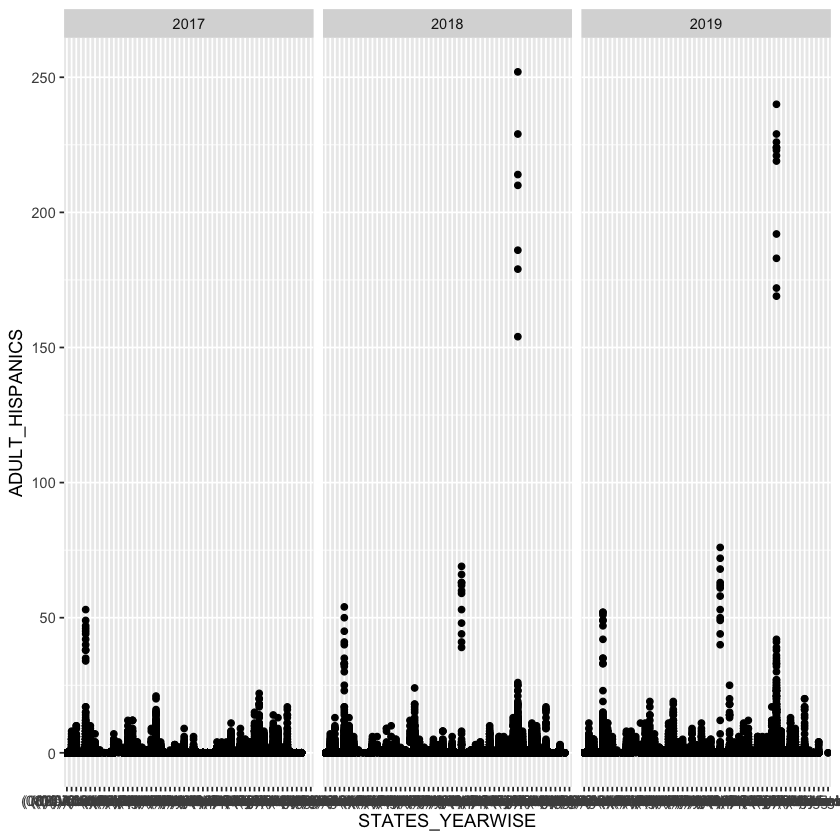

In [196]:
ggplot(data = combined_df, aes(x = STATE, y = AH)) +
  geom_point() + facet_wrap(~ YEAR) +
  labs(y = "ADULT_HISPANICS",
       x = "STATES_YEARWISE")

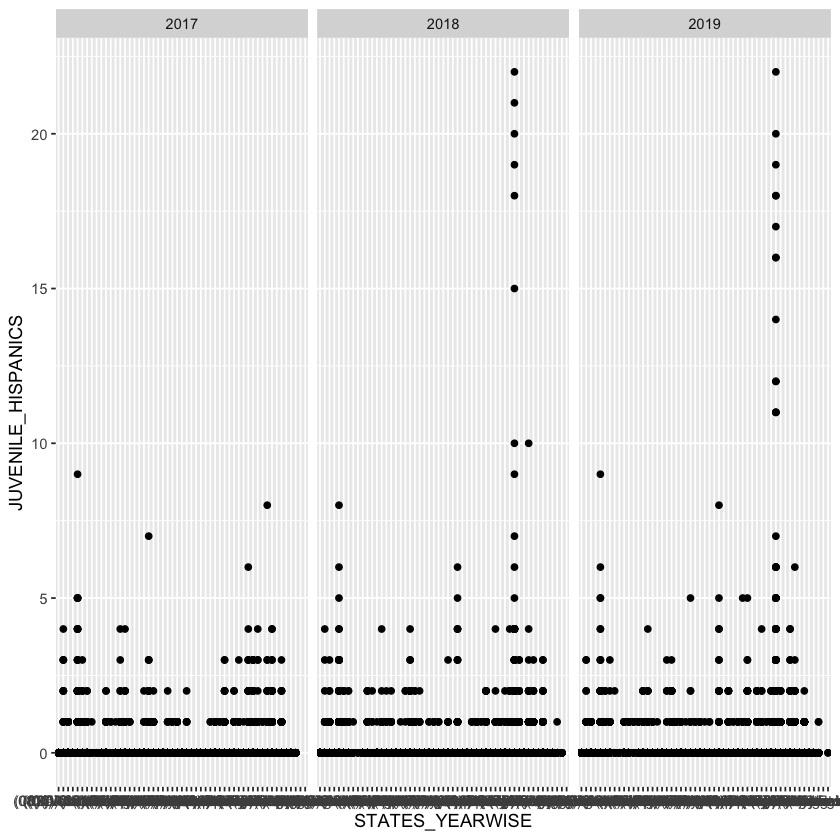

In [197]:
ggplot(data = combined_df, aes(x = STATE, y = JH)) +
  geom_point() + facet_wrap(~ YEAR) +
  labs(y = "JUVENILE_HISPANICS",
       x = "STATES_YEARWISE")

In [119]:
#combined_df %>% 
  #group_by(STATE) %>% 
  #summarise(count = n()) %>% 
  #arrange(-count)

In [125]:
head(combined_df)

,STATE,YEAR,SUB,CORE,MONTH,AW,AB,AI,AA,JW,⋯,Age_juve,Age_adult,Total,juve,adult,avgtotal,avgjuve,avgadult,summer,whites
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,nonsuburban,core,1,28,13,36,4,1,⋯,36,2166,87,8,79,26.33333,4.5,27.41772,0,29
2,(50) Alaska,2019,nonsuburban,core,2,33,18,28,3,3,⋯,55,2530,87,5,82,27.92529,11.0,30.85366,0,36
3,(50) Alaska,2019,nonsuburban,core,3,36,14,35,8,4,⋯,81,3175,99,6,93,29.33333,13.5,34.13978,0,40
4,(50) Alaska,2019,nonsuburban,core,4,33,12,39,5,7,⋯,195,3549,100,13,87,32.87000,15.0,40.79310,0,40
5,(50) Alaska,2019,nonsuburban,core,5,28,11,45,9,4,⋯,128,3370,99,8,91,29.81313,16.0,37.03297,1,32
6,(50) Alaska,2019,nonsuburban,core,6,29,8,42,13,2,⋯,102,2853,96,6,90,25.44271,17.0,31.70000,1,31


In [131]:
combined_df_total_adult <- combined_df %>% group_by(STATE)%>%
                            summarize(total_adultWhite= sum(AW),total_adultBlack= sum(AB),total_adultAsian= sum(AA),total_adultIndian= sum(AI),total_adultHispanic= sum(AH))
  
head(combined_df_total_adult)



STATE,total_adultWhite,total_adultBlack,total_adultAsian,total_adultIndian,total_adultHispanic
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(01) Alabama,5544,5765,29,8,0
(02) Arizona,16813,4465,202,7545,275
(03) Arkansas,6721,4526,67,24,655
(04) California,192198,51117,7906,1578,0
(05) Colorado,13753,3553,197,274,4304
(06) Connecticut,3506,2673,41,27,1107


In [154]:
combined_df_total_juvenile <- combined_df %>% group_by(STATE)%>%
                            summarize(total_juveWhite= sum(JW),total_juveBlack= sum(JB),total_juveAsian= sum(JA),total_juveIndian= sum(JI),total_juveHispanic= sum(JH)

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: combined_df_total_juvenile <- combined_df %>% group_by(STATE)%>%
2:                             summarize(total_juveWhite= sum(JW),total_juveBlack= sum(JB),total_juveAsian= sum(JA),total_juveIndian= sum(JI),total_juveHispanic= sum(JH)
  ^


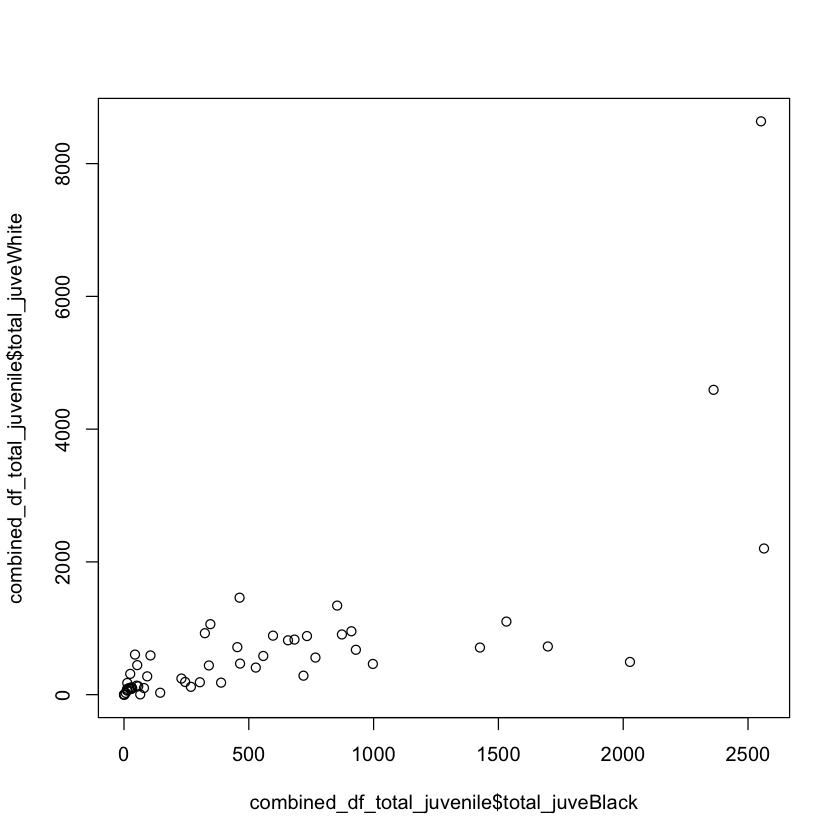

In [141]:
plot(combined_df_total_juvenile$total_juveWhite~combined_df_total_juvenile$total_juveBlack)

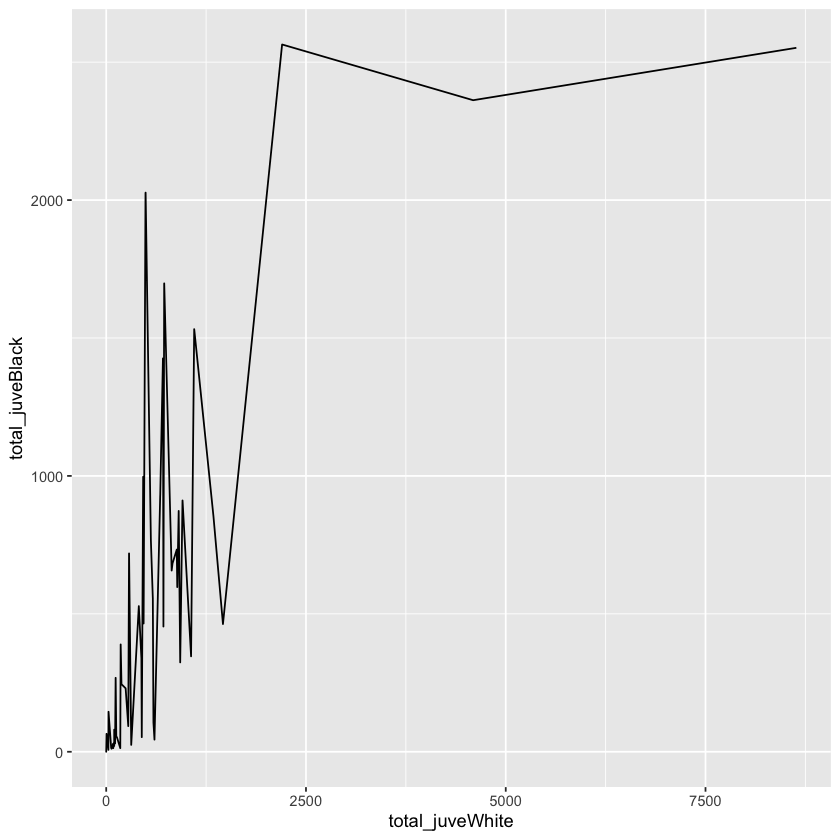

In [145]:
ggplot(combined_df_total_juvenile,aes(x=total_juveWhite,y=total_juveBlack))+geom_line()

In [181]:

m1 <- Map_State %>% rename(STATE = region)
m1[,5] <- toupper(m1[,5])
head(m1)

,long,lat,group,order,STATE,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-87.46201,30.38968,1,1,ALABAMA,NA
2,-87.48493,30.37249,1,2,ALABAMA,NA
3,-87.52503,30.37249,1,3,ALABAMA,NA
4,-87.53076,30.33239,1,4,ALABAMA,NA
5,-87.57087,30.32665,1,5,ALABAMA,NA
6,-87.58806,30.32665,1,6,ALABAMA,NA


In [184]:
dim(m1)

[1] 15537     6

In [185]:
dim(combined_df_total_adult)

[1] 53  6

In [183]:


mapData_1 <- merge(x=m1,y=combined_df_total_adult, 
             by="STATE", all.x=TRUE)

#mapData_1 <- leftjoin (Map_State,combined_df_total_adult,by="STATE")


Map_1 <- ggplot(mapData_1,aes(x=long,y=lat,group=group,fill=combined_df_total_adult$total_adultWhite),colour="Black",size=0.2)
Map_1

ERROR while rich displaying an object: Error in `geom_blank()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `check_aesthetics()`:
! Aesthetics must be either length 1 or the same as the data (15537)
✖ Fix the following mappings: `fill`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.nu

In [104]:
if ( ! "ggplot2" %in% installed.packages()[,1] ) {
  install.packages("ggplot2")
}
require(ggplot2)

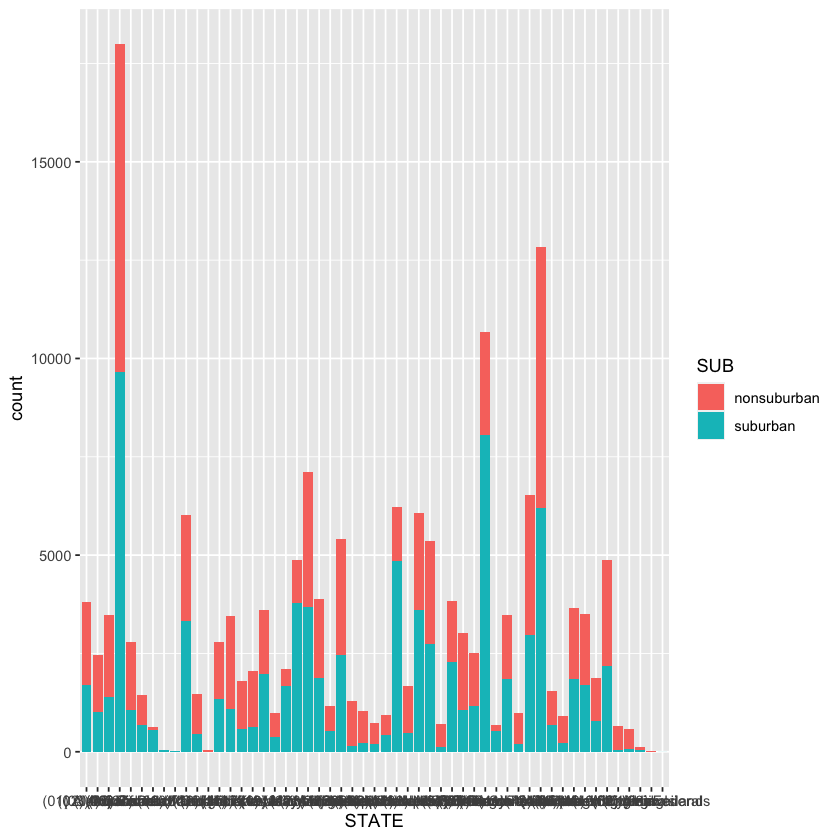

In [105]:
library(ggplot2)

# stacked bar chart
ggplot(combined_df, aes(x = STATE, fill = SUB)) + 
  geom_bar(position = "stack")

In [127]:
top_10_sub <- top_n(combined_df,10,AI)
top_10_sub

STATE,YEAR,SUB,CORE,MONTH,AW,AB,AI,AA,JW,⋯,Age_juve,Age_adult,Total,juve,adult,avgtotal,avgjuve,avgadult,summer,whites
<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(02) Arizona,2019,nonsuburban,noncore,7,0,0,117,0,0,⋯,90.0,3123,120,6,114,27.82917,15.0,27.39474,1,0
(02) Arizona,2017,nonsuburban,noncore,1,0,0,120,0,0,⋯,18.0,5365,124,4,120,29.62097,4.5,44.70833,0,0
(02) Arizona,2017,nonsuburban,noncore,3,0,0,115,0,0,⋯,54.0,3795,118,4,114,34.18644,13.5,33.28947,0,0
(02) Arizona,2017,nonsuburban,noncore,4,0,1,123,0,0,⋯,60.0,4036,127,4,123,26.07480,15.0,32.81301,0,0
(02) Arizona,2017,nonsuburban,noncore,7,0,1,135,0,0,⋯,144.0,3873,138,8,130,29.80072,18.0,29.79231,1,0
(02) Arizona,2017,nonsuburban,noncore,9,0,2,121,0,0,⋯,88.0,4652,128,8,120,36.12109,11.0,38.76667,1,0
(02) Arizona,2017,nonsuburban,noncore,10,0,0,121,0,0,⋯,94.5,5365,127,7,120,39.44094,13.5,44.70833,1,0
(02) Arizona,2017,nonsuburban,noncore,11,0,2,143,0,0,⋯,60.0,6267,148,4,144,22.98986,15.0,43.52083,0,0
(02) Arizona,2018,nonsuburban,noncore,1,0,0,127,0,0,⋯,135.0,5601,132,9,123,31.07197,15.0,45.53659,0,0


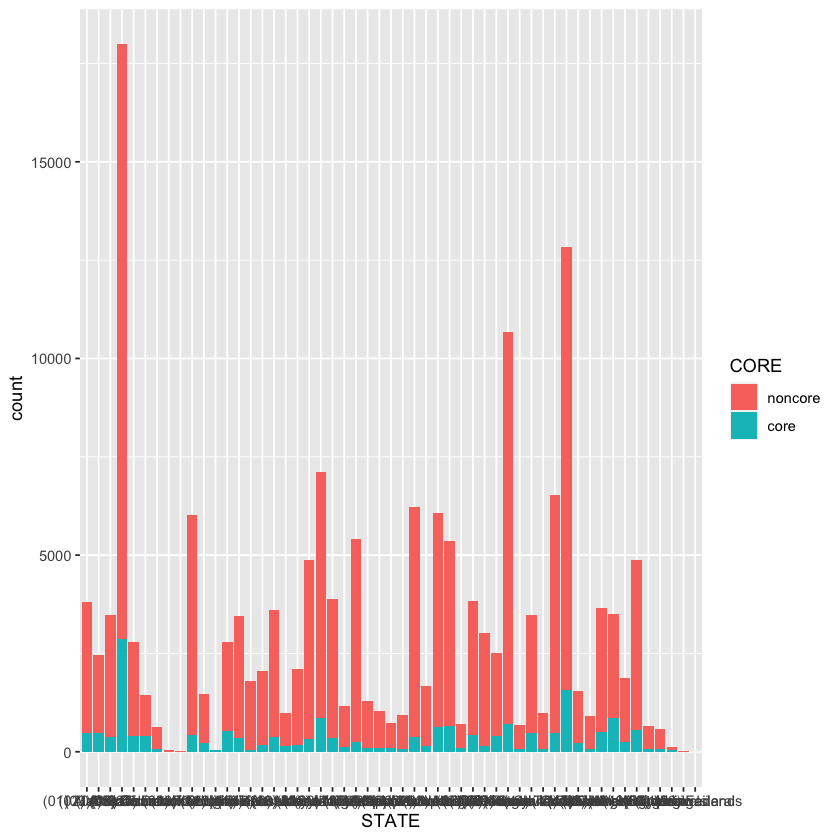

In [106]:
library(ggplot2)

# stacked bar chart
ggplot(combined_df, aes(x = STATE, fill = CORE)) + 
  geom_bar(position = "stack")

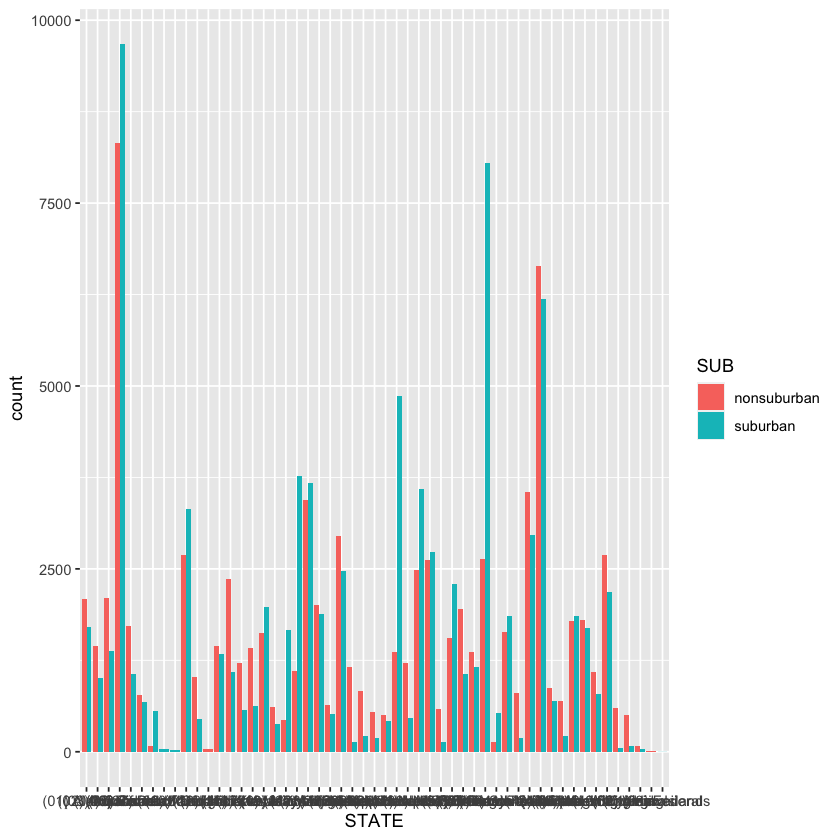

In [107]:
library(ggplot2)

# grouped bar plot
ggplot(combined_df, aes(x = STATE, fill = SUB)) + 
  geom_bar(position = "dodge")

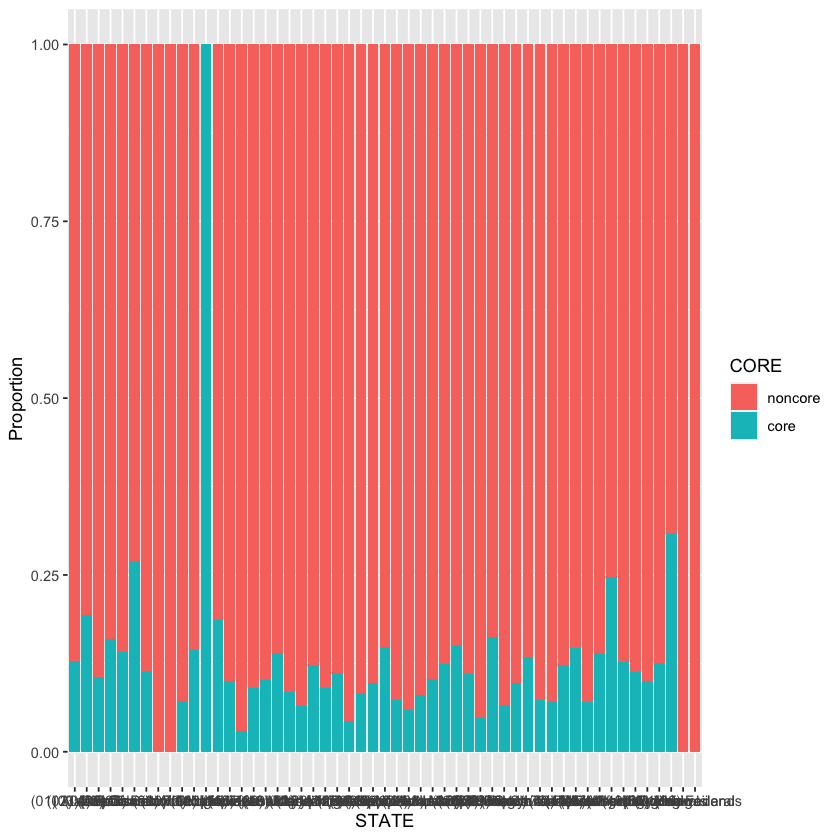

In [108]:
library(ggplot2)

# bar plot, with each bar representing 100%
ggplot(combined_df, aes(x = STATE, fill = CORE)) + 
  geom_bar(position = "fill") +
  labs(y = "Proportion")

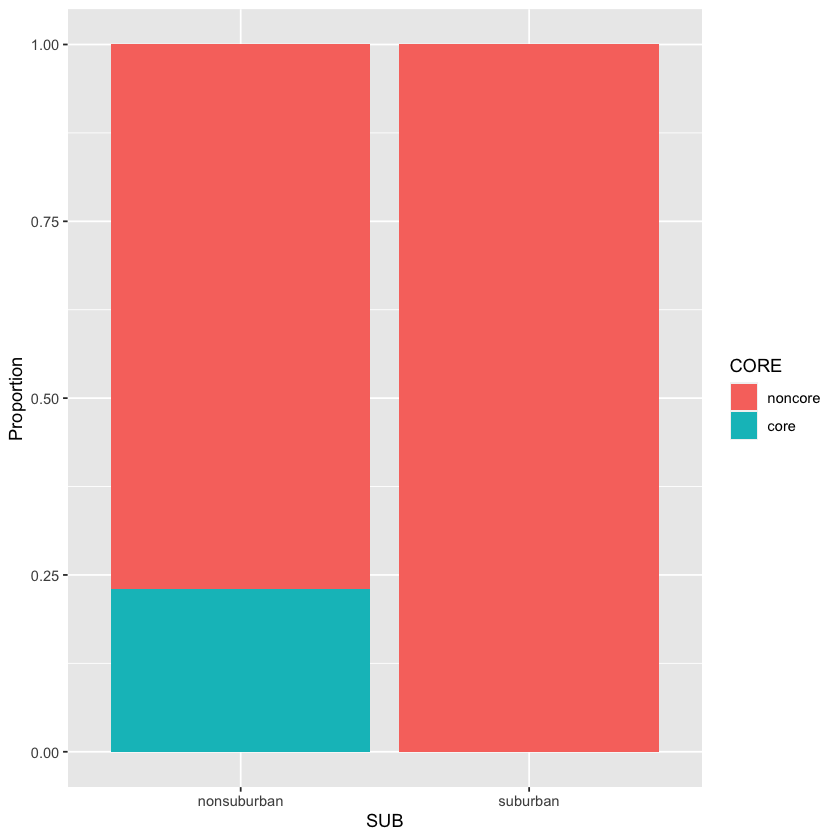

In [109]:
library(ggplot2)

# bar plot, with each bar representing 100%
ggplot(combined_df, aes(x = SUB, fill = CORE)) + 
  geom_bar(position = "fill") +
  labs(y = "Proportion")

Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


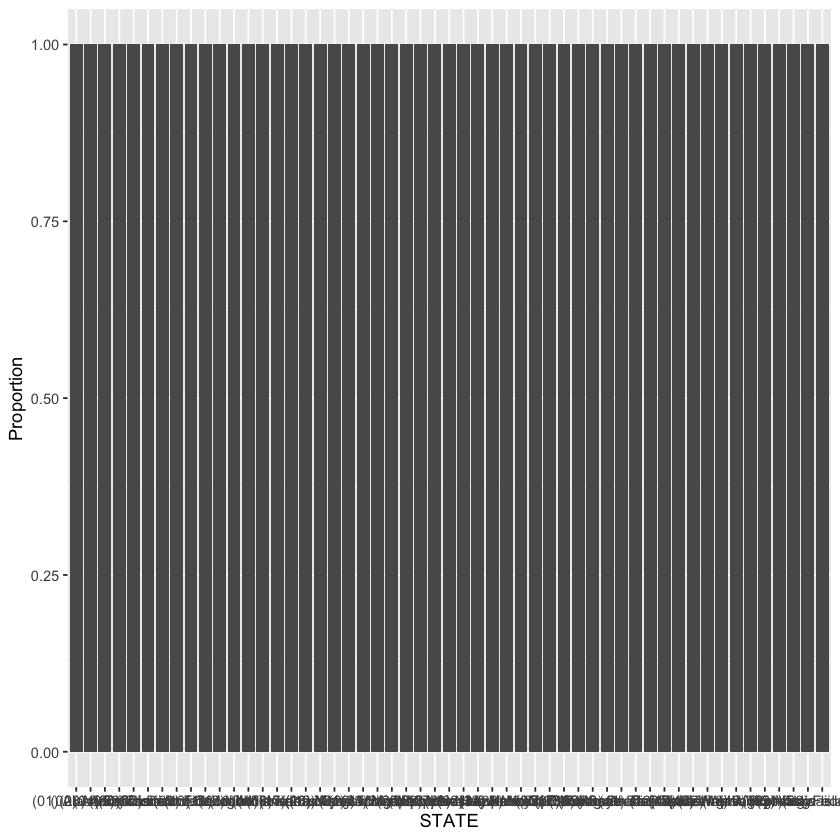

In [147]:
# bar plot, with each bar representing 100%
ggplot(combined_df, aes(x = STATE, fill = YEAR)) + 
  geom_bar(position = "fill") +
  labs(y = "Proportion")

In [150]:
ggplot(data = combined_df_total_adult, aes(x = States, y = Total_adultWhites)) +
  geom_point() + facet_wrap(~ YEAR) +
  labs(y = "Diabetes pedigree function",
       x = "Diastolic blood pressure (mm Hg)")

ERROR while rich displaying an object: Error in `combine_vars()`:
! At least one layer must contain all faceting variables: `YEAR`
✖ Plot is missing `YEAR`
✖ Layer 1 is missing `YEAR`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handl

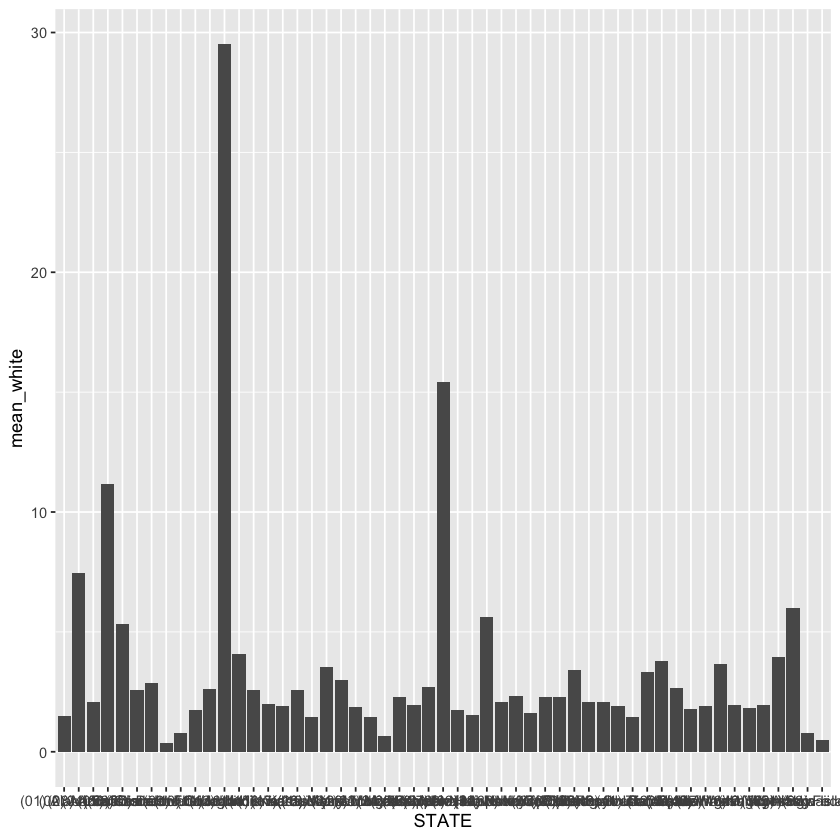

In [114]:
# calculate mean salary for each rank
library(dplyr)
plotdata <- combined_df %>%
  group_by(STATE) %>%
  summarize(mean_white = mean(whites))

# plot mean salaries
ggplot(plotdata,aes(x = STATE, y = mean_white)) +
  geom_bar(stat = "identity")

In [206]:
# Set seed for reproducibility
set.seed(123)

# Number of iterations
n_iterations <- 1000

# Function to estimate theta_1 and theta_2
estimate_theta <- function(lambda, x_values) {
  theta_1 <- sum(x_values) / sum(x_values^2)
  theta_2 <- mean(x_values)
  return(c(theta_1, theta_2))
}

# Initialize vectors to store theta estimates
theta_1_values <- numeric(n_iterations)
theta_2_values <- numeric(n_iterations)

# Simulate the process 1000 times
for (iteration in 1:n_iterations) {
  # Initialize lambda and xi values
  lambda <- 1
  xi <- 1:10
  
  # Generate Yi ~ Poisson(lambda * xi) for xi = 1 to 10
  Yi <- rpois(length(xi), lambda * xi)
  
  # Estimate theta_1 and theta_2
  theta_estimates <- estimate_theta(lambda, xi)
  
  # Store theta estimates
  theta_1_values[iteration] <- theta_estimates[1]
  theta_2_values[iteration] <- theta_estimates[2]
}

# Calculate statistics
bias_theta_1 <- mean(theta_1_values) - 2/3
bias_theta_2 <- mean(theta_2_values) - 5.5
std_dev_theta_1 <- sd(theta_1_values)
std_dev_theta_2 <- sd(theta_2_values)
RMSE_theta_1 <- sqrt(mean((theta_1_values - 2/3)^2))
RMSE_theta_2 <- sqrt(mean((theta_2_values - 5.5)^2))
L1_risk_theta_1 <- mean(abs(theta_1_values - 2/3))
L1_risk_theta_2 <- mean(abs(theta_2_values - 5.5))
c_value <- 0.1
large_dev_loss_theta_1 <- mean(ifelse(abs(theta_1_values - 2/3) > c_value, 1, 0))
large_dev_loss_theta_2 <- mean(ifelse(abs(theta_2_values - 5.5) > c_value, 1, 0))

# Create a table
result_table <- data.frame(
  Statistics = c("Average Bias", "Sample Standard Deviation", "Root MSE", "Average Absolute Deviation Loss", 
                 "Average Large Deviation Loss (c = 0.1)"),
  Theta_1 = c(bias_theta_1, std_dev_theta_1, RMSE_theta_1, L1_risk_theta_1, large_dev_loss_theta_1),
  Theta_2 = c(bias_theta_2, std_dev_theta_2, RMSE_theta_2, L1_risk_theta_2, large_dev_loss_theta_2)
)

# Print the table
print(result_table)

                              Statistics    Theta_1 Theta_2
1                           Average Bias -0.5238095       0
2              Sample Standard Deviation  0.0000000       0
3                               Root MSE  0.5238095       0
4        Average Absolute Deviation Loss  0.5238095       0
5 Average Large Deviation Loss (c = 0.1)  1.0000000       0


In [ ]:
library(ggplot2)
data(Salaries, package="carData")

# simple scatterplot
ggplot(Salaries, 
       aes(x = yrs.since.phd, y = salary)) +
  geom_point()

In [110]:
combined_df$whites = combined_df$AW +  combined_df$JW

In [68]:
combined_df$asians = combined_df$AA +  combined_df$JA

In [69]:
combined_df$indians = combined_df$AI +  combined_df$JI

In [70]:
combined_df$blacks = combined_df$AB +  combined_df$JB

In [71]:
combined_df$hispanic = combined_df$AH +  combined_df$JH

In [111]:
head(combined_df)

,STATE,YEAR,SUB,CORE,MONTH,AW,AB,AI,AA,JW,⋯,Age_juve,Age_adult,Total,juve,adult,avgtotal,avgjuve,avgadult,summer,whites
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,nonsuburban,core,1,28,13,36,4,1,⋯,36,2166,87,8,79,26.33333,4.5,27.41772,0,29
2,(50) Alaska,2019,nonsuburban,core,2,33,18,28,3,3,⋯,55,2530,87,5,82,27.92529,11.0,30.85366,0,36
3,(50) Alaska,2019,nonsuburban,core,3,36,14,35,8,4,⋯,81,3175,99,6,93,29.33333,13.5,34.13978,0,40
4,(50) Alaska,2019,nonsuburban,core,4,33,12,39,5,7,⋯,195,3549,100,13,87,32.87000,15.0,40.79310,0,40
5,(50) Alaska,2019,nonsuburban,core,5,28,11,45,9,4,⋯,128,3370,99,8,91,29.81313,16.0,37.03297,1,32
6,(50) Alaska,2019,nonsuburban,core,6,29,8,42,13,2,⋯,102,2853,96,6,90,25.44271,17.0,31.70000,1,31
